<a href="https://colab.research.google.com/github/DavidMotaGasso/08MBID---Visualizacion-de-Datos---Trabajo-Practico/blob/master/Visualizacion_de_datos_Trabajo_practico_Correlacion_de_puntos%2C_rebotes_y_asistencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# carga de datos
import pandas as pd
import io
from google.colab import files

# manipulación y visualización
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
dataset = upload_files()
dataset.head()

Saving base_datos_ncaa_visualizacion.csv to base_datos_ncaa_visualizacion.csv
User uploaded file "base_datos_ncaa_visualizacion.csv" with length 3865176 bytes


,season,gametime,team_name,team_conf_name,game_outcome,points_game,team_points_game,team_three_point_pct,team_two_points_pct,team_free_throws_pct,team_rebounds,team_assists,team_turnovers,team_steals,team_blocks,will_be_in_march_madness
0,2014,2014-11-14 16:00:00 UTC,EWU,Big Sky,Win,148,86,44.1,0.567,46.7,42,15,15,7,9,1
1,2014,2014-11-14 16:00:00 UTC,TXSO,Southwestern Athletic,Loss,148,62,16.0,0.400,71.0,36,7,14,8,1,1
2,2014,2014-11-14 18:00:00 UTC,SHSU,Southland,Win,152,100,25.0,0.725,60.0,53,26,15,11,10,1
3,2014,2014-11-14 18:00:00 UTC,AUS,Southern Collegiate Athletic Conference,Loss,152,52,0.0,0.000,0.0,0,0,0,0,0,0
4,2014,2014-11-14 18:30:00 UTC,EMU,Mid-American,Win,116,64,16.7,0.553,56.5,36,9,10,12,4,1


In [ ]:
# Copia de las bases de datos subidas por poder resetear sin subirlas de nuevo
dataset_visualizacion = dataset.copy()

In [ ]:
dataset_visualizacion

,season,gametime,team_name,team_conf_name,game_outcome,points_game,team_points_game,team_three_point_pct,team_two_points_pct,team_free_throws_pct,team_rebounds,team_assists,team_turnovers,team_steals,team_blocks,will_be_in_march_madness
0,2014,2014-11-14 16:00:00 UTC,EWU,Big Sky,Win,148,86,44.1,0.567,46.7,42,15,15,7,9,1
1,2014,2014-11-14 16:00:00 UTC,TXSO,Southwestern Athletic,Loss,148,62,16.0,0.400,71.0,36,7,14,8,1,1
2,2014,2014-11-14 18:00:00 UTC,SHSU,Southland,Win,152,100,25.0,0.725,60.0,53,26,15,11,10,1
3,2014,2014-11-14 18:00:00 UTC,AUS,Southern Collegiate Athletic Conference,Loss,152,52,0.0,0.000,0.0,0,0,0,0,0,0
4,2014,2014-11-14 18:30:00 UTC,EMU,Mid-American,Win,116,64,16.7,0.553,56.5,36,9,10,12,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44203,2017,2018-03-04 20:00:00 UTC,TEM,American Athletic,Loss,134,58,24.0,41.700,66.7,27,8,12,10,3,1
44204,2017,2018-03-04 21:00:00 UTC,HOU,American Athletic,Win,152,81,40.0,48.500,73.5,32,9,13,5,0,1
44205,2017,2018-03-04 21:00:00 UTC,CONN,American Athletic,Loss,152,71,35.0,63.000,66.7,21,10,13,8,1,0
44206,2017,2018-03-04 21:30:00 UTC,UCF,American Athletic,Win,111,60,31.3,43.800,70.8,31,8,11,8,4,0


In [ ]:
dataset_variables_visualizacion = dataset_visualizacion[['team_points_game','team_rebounds','team_assists']]
dataset_variables_visualizacion

,team_points_game,team_rebounds,team_assists
0,86,42,15
1,62,36,7
2,100,53,26
3,52,0,0
4,64,36,9
...,...,...,...
44203,58,27,8
44204,81,32,9
44205,71,21,10
44206,60,31,8


<Figure size 1600x1600 with 0 Axes>

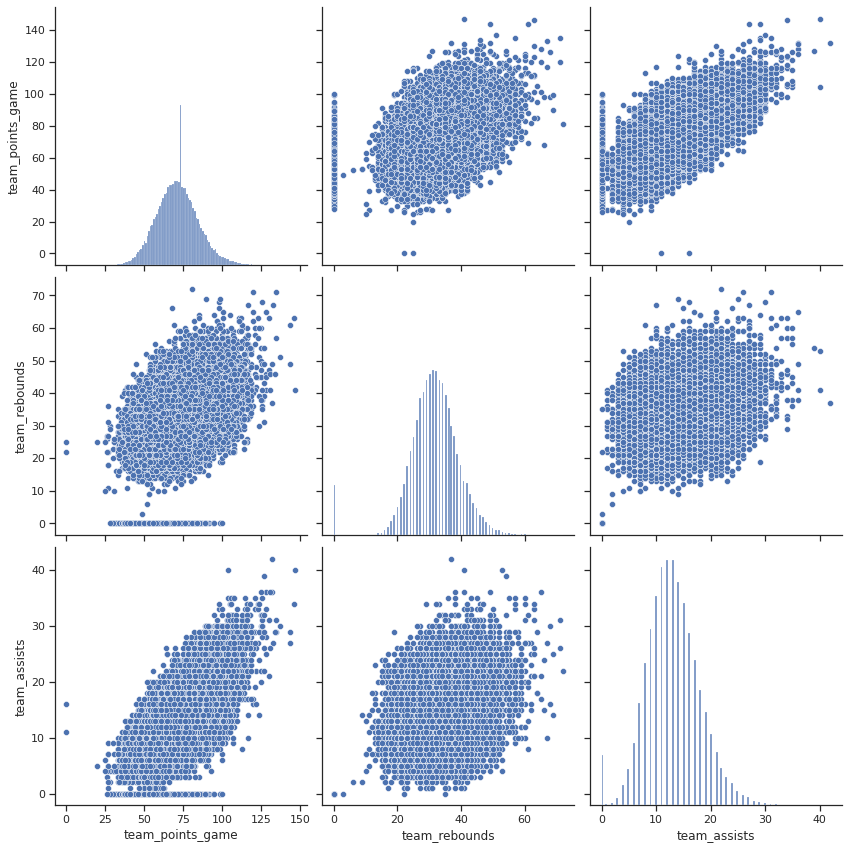

In [ ]:
fig=figure(figsize=(20, 20), dpi=80)
sns.set_theme(style="ticks")
sns.pairplot(dataset_variables_visualizacion, height=4) #, hue="species")